### Các Thông Tin Header của file âm thanh WAV


In [1]:
import wave

# Đường dẫn tới file WAV
file_path = "./WAV/102888__uknow-dude__drum-loop-solo-kick-119-bpm.wav"

# Mở file WAV và đọc thông tin header
with wave.open(file_path, "rb") as wav_file:
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    sample_rate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    duration = n_frames / sample_rate

    print("Thông tin header của file WAV:")
    print(f"Số kênh: {n_channels}")
    print(f"Số byte mỗi mẫu: {sample_width}")
    print(f"Tần số mẫu: {sample_rate} Hz")
    print(f"Tổng số mẫu: {n_frames}")
    print(f"Thời lượng: {duration:.2f} seconds")


Thông tin header của file WAV:
Số kênh: 2
Số byte mỗi mẫu: 2
Tần số mẫu: 44100 Hz
Tổng số mẫu: 355766
Thời lượng: 8.07 seconds


### Biễu Diễn Đồ Họa Dạng Sóng

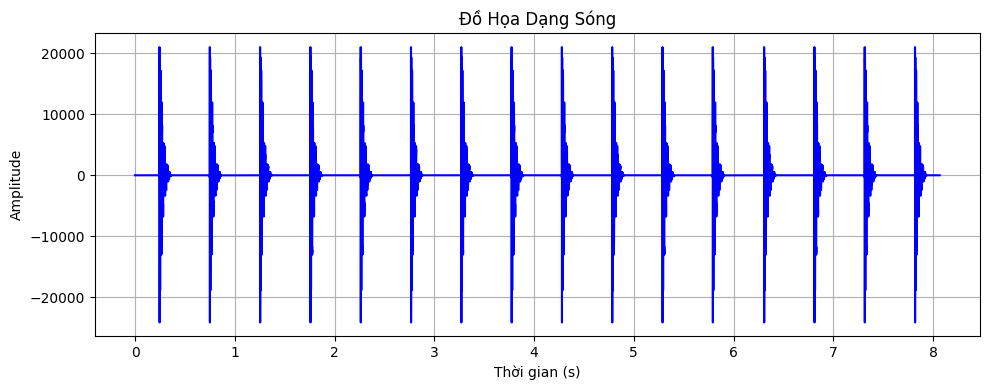

In [2]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới file WAV
file_path = "./WAV/102888__uknow-dude__drum-loop-solo-kick-119-bpm.wav"

# Mở file WAV và đọc dữ liệu
with wave.open(file_path, "rb") as wav_file:
    n_channels = wav_file.getnchannels()
    sample_rate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    duration = n_frames / sample_rate

    raw_data = wav_file.readframes(n_frames)
    audio_data = np.frombuffer(raw_data, dtype=np.int16)

    if n_channels == 2:
        audio_data = np.reshape(audio_data, (-1, 2))
        audio_data = audio_data[:, 0]

# Tạo trục thời gian
time = np.linspace(0, duration, len(audio_data))

# Vẽ đồ họa dạng sóng
plt.figure(figsize=(10, 4))
plt.plot(time, audio_data, color="blue")
plt.title("Đồ Họa Dạng Sóng")
plt.xlabel("Thời gian (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()


### Đồ Họa Phổ Tần Số

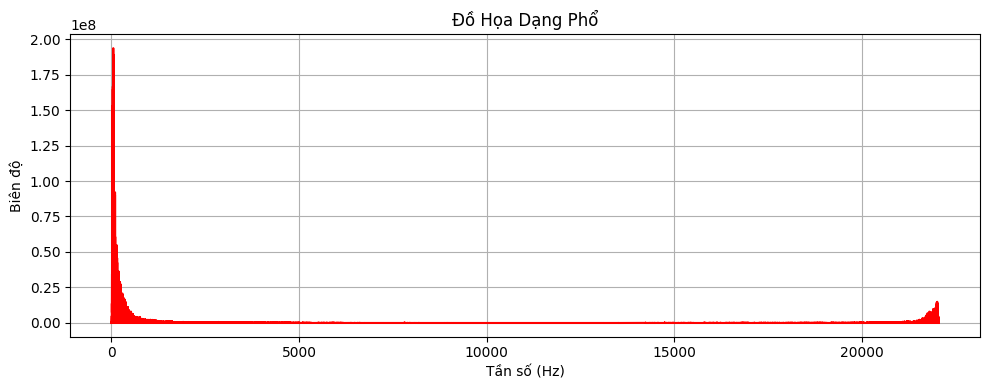

In [3]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn tới file WAV
file_path = "./WAV/102888__uknow-dude__drum-loop-solo-kick-119-bpm.wav"

# Mở file WAV và đọc dữ liệu
with wave.open(file_path, "rb") as wav_file:
    sample_rate = wav_file.getframerate()
    n_frames = wav_file.getnframes()

    raw_data = wav_file.readframes(n_frames)
    audio_data = np.frombuffer(raw_data, dtype=np.int16)

# Thực hiện FFT để chuyển tín hiệu từ miền thời gian sang miền tần số
n = len(audio_data)
frequencies = np.fft.fftfreq(n, 1/sample_rate)
fft_values = np.fft.fft(audio_data)

# Lấy biên độ của phổ
magnitude = np.abs(fft_values)

# Lọc các tần số dương
positive_frequencies = frequencies[:n // 2]
positive_magnitude = magnitude[:n // 2]

# Vẽ đồ họa phổ
plt.figure(figsize=(10, 4))
plt.plot(positive_frequencies, positive_magnitude, color="red")
plt.title("Đồ Họa Dạng Phổ")
plt.xlabel("Tần số (Hz)")
plt.ylabel("Biên độ")
plt.grid()
plt.tight_layout()
plt.show()
